# Data Collection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/garments_worker_productivity.csv', sep=';')
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,01/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
2,01/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,01/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,01/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   object 
dtypes: f

In [ ]:
data.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


# 1. Univariate Analysis

# a. Quantitative Features

In [ ]:
# Menentukan fitur kuantitatif
quantitative_cols = ['targeted_productivity', 'smv', 'wip', 'over_time',
                     'incentive', 'idle_time', 'idle_men',
                     'no_of_style_change', 'no_of_workers', 'actual_productivity']

# Statistik deskriptif[quantitative_cols].describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


Histogram dan Density Plot

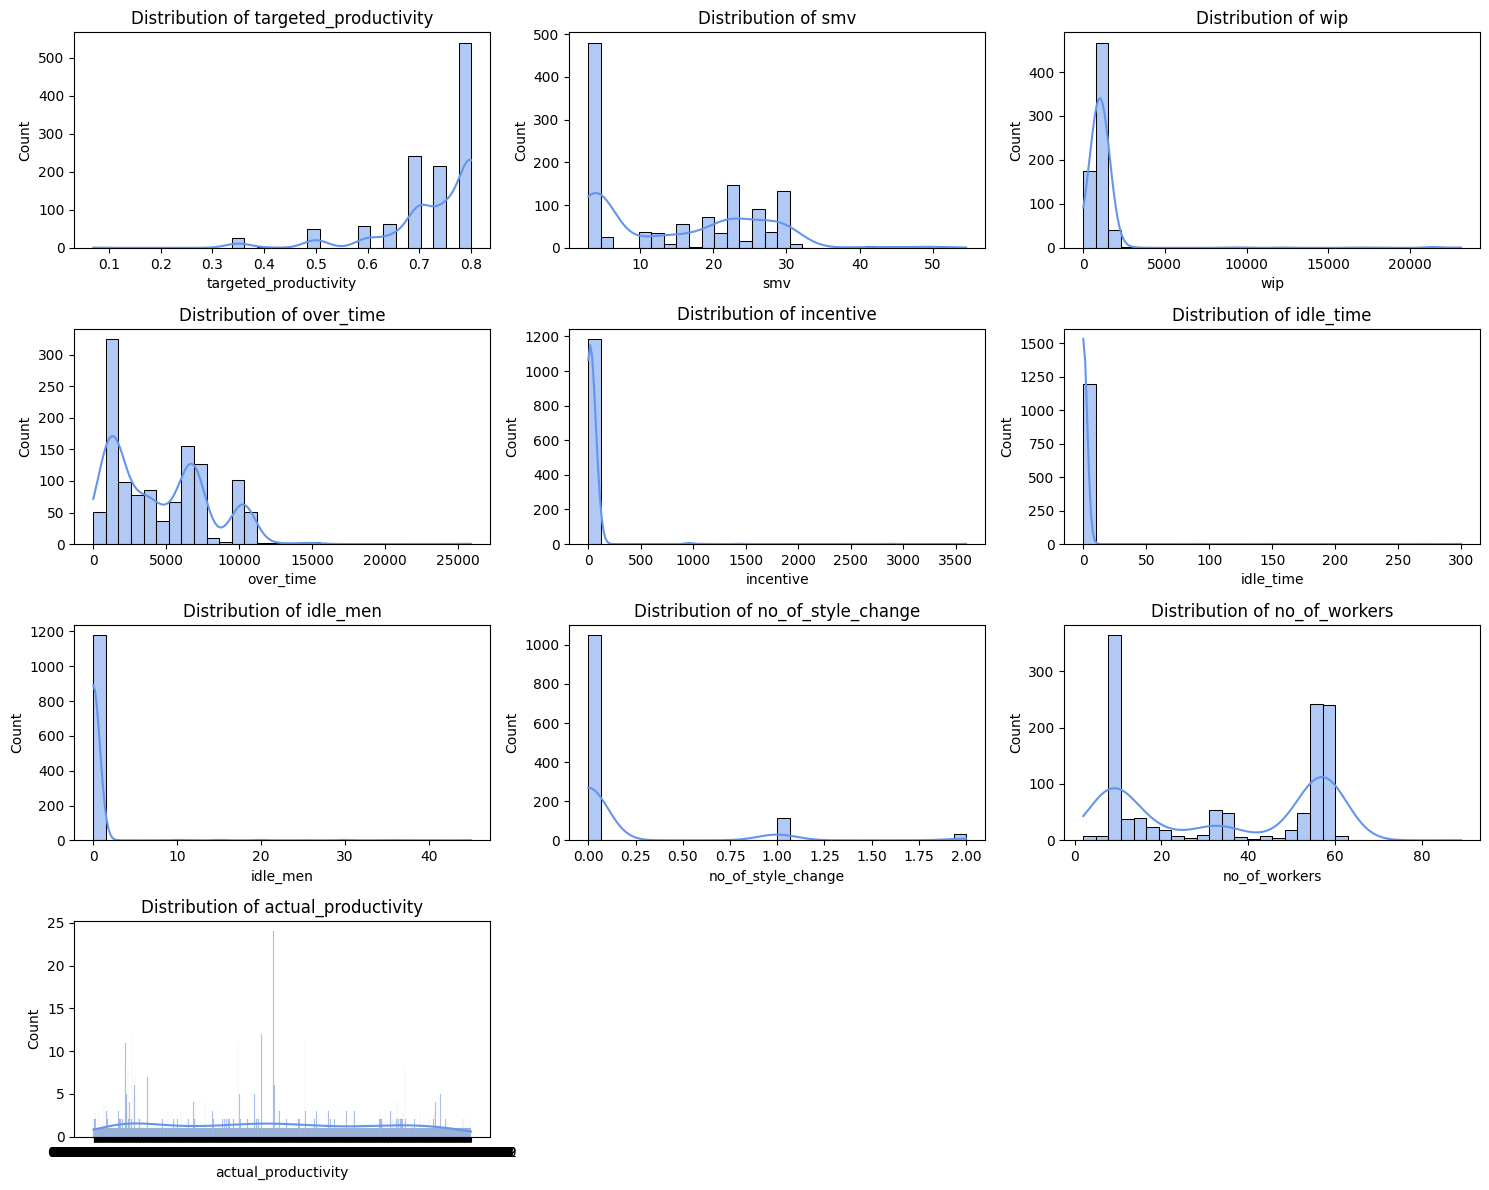

In [ ]:
# Visualisasi distribusi
plt.figure(figsize=(15, 12))
for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Box Plot

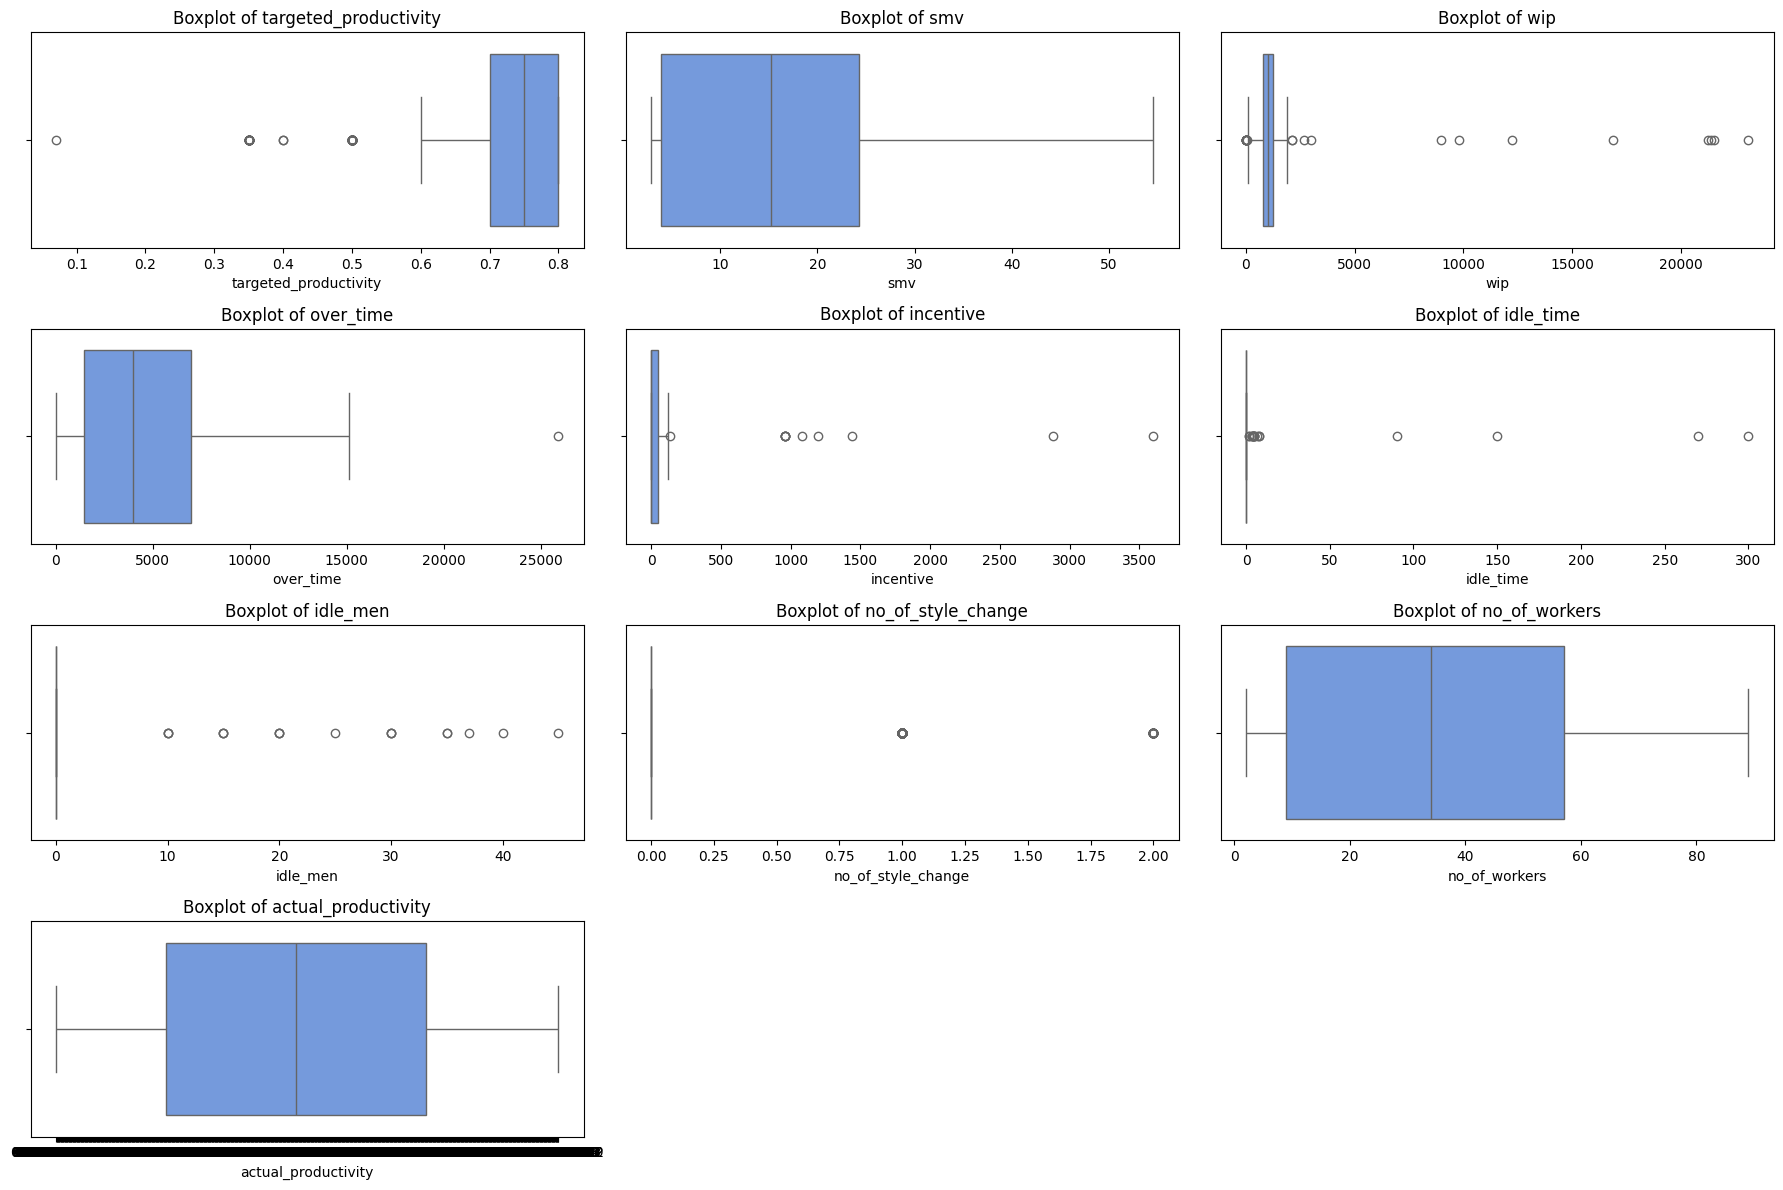

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=data[col], color='cornflowerblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Violin Plot

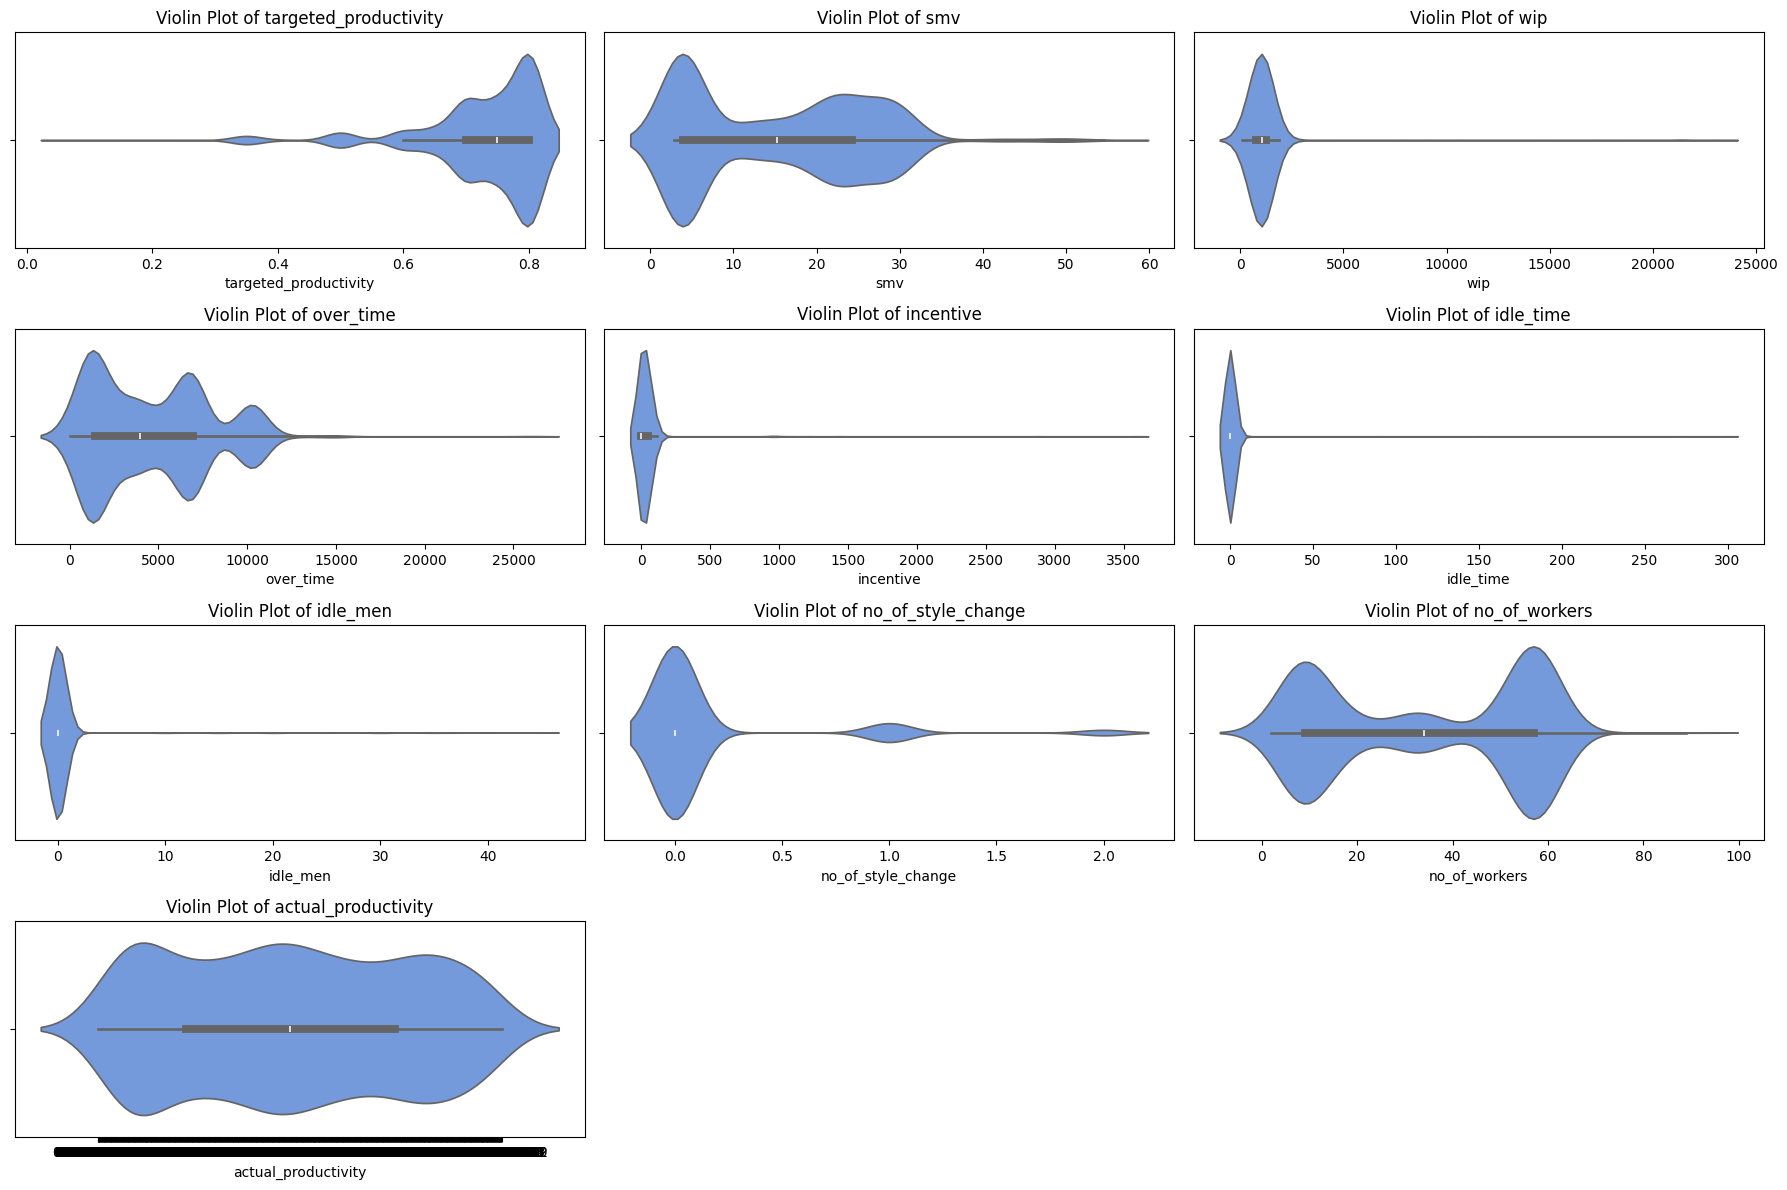

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 3, i+1)
    sns.violinplot(x=data[col], color='cornflowerblue')
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

# b. Categorical & Binary Features

Frequency table

In [ ]:
# Menentukan fitur kategorikal dan biner
categorical_cols = ['quarter', 'department', 'day', 'team']

# Menggabungkan kategori finishing dalam department
# Periksa apakah ada nilai yang mengandung "finishing" dan buat mereka konsisten
data['department'] = data['department'].apply(lambda x: 'finishing' if 'finishing' in str(x).lower() else x)

# Tampilkan frekuensi setelah penggabungan
for col in categorical_cols:
    print(f"\nFrequency table for {col}:\n{data[col].value_counts()}")

data[categorical_cols].describe()


Frequency table for quarter:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Frequency table for department:
department
sweing       691
finishing    506
Name: count, dtype: int64

Frequency table for day:
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

Frequency table for team:
team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64


,team
count,1197.000000
mean,6.426901
std,3.463963
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000


Bar plot

<ipython-input-18-a6115be01e2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=categorical_cols, palette="Set2")
<ipython-input-18-a6115be01e2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=categorical_cols, palette="Set2")
<ipython-input-18-a6115be01e2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=categorical_cols, palette="Set2")
<ipython-input-18-a6115be01e2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

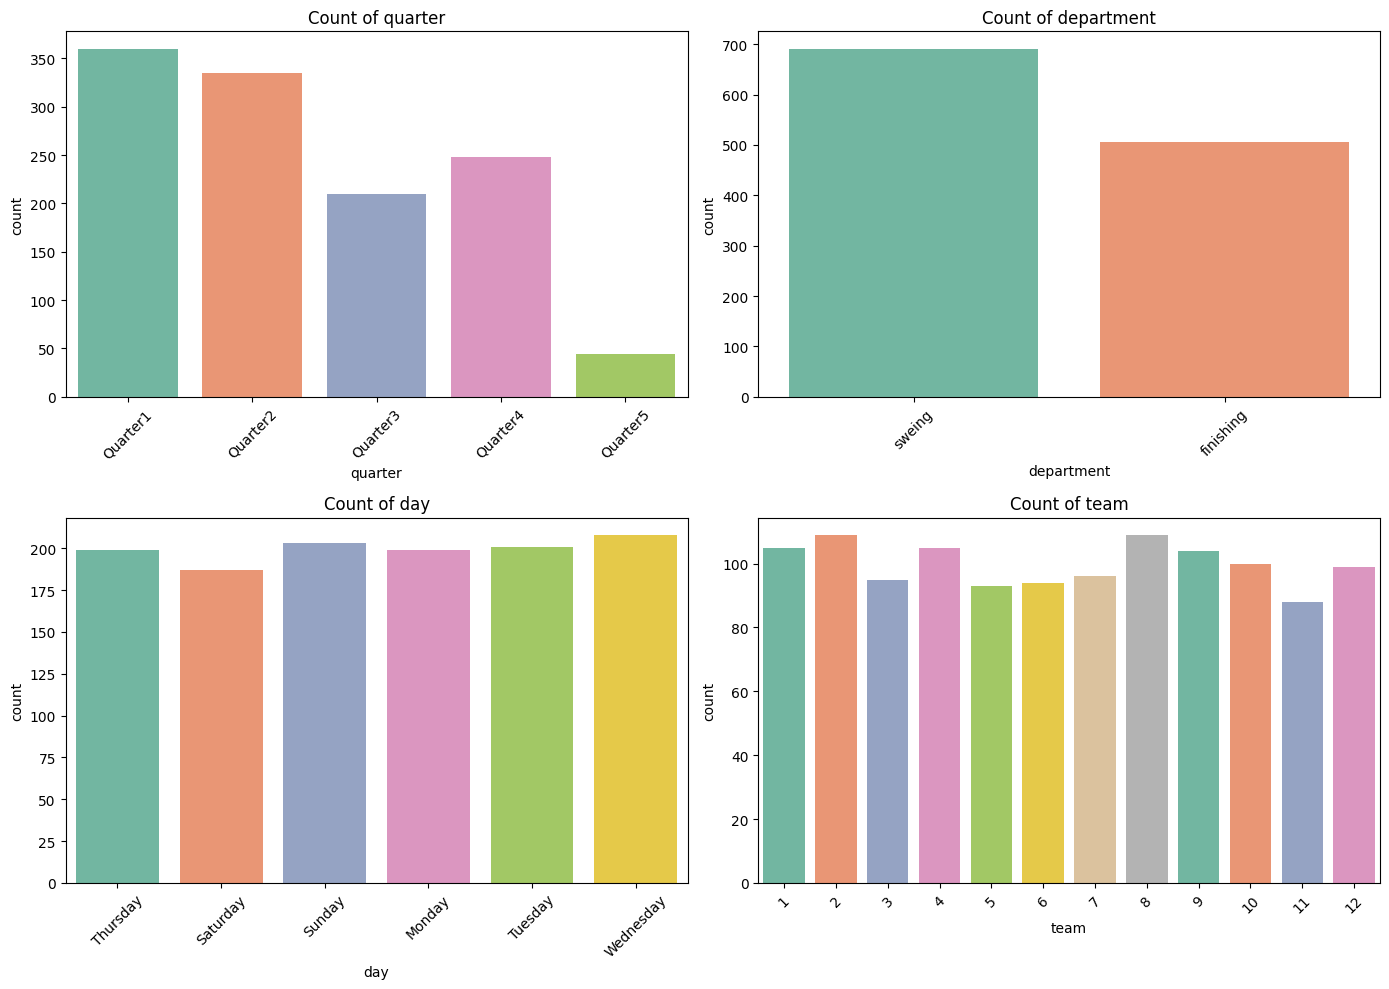

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 10))
for i, categorical_cols in enumerate(categorical_categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=data, x=categorical_cols, palette="Set2")
    plt.title(f'Count of {categorical_cols}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.  Multivariate Analysis

# a. Quantitative vs quantitative

Correlation Matrix

                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   

                       over_time  incentive  idle_time  idle_men  \
team                   -0.096737  -0.007674   0.003796  0.026974   
targe

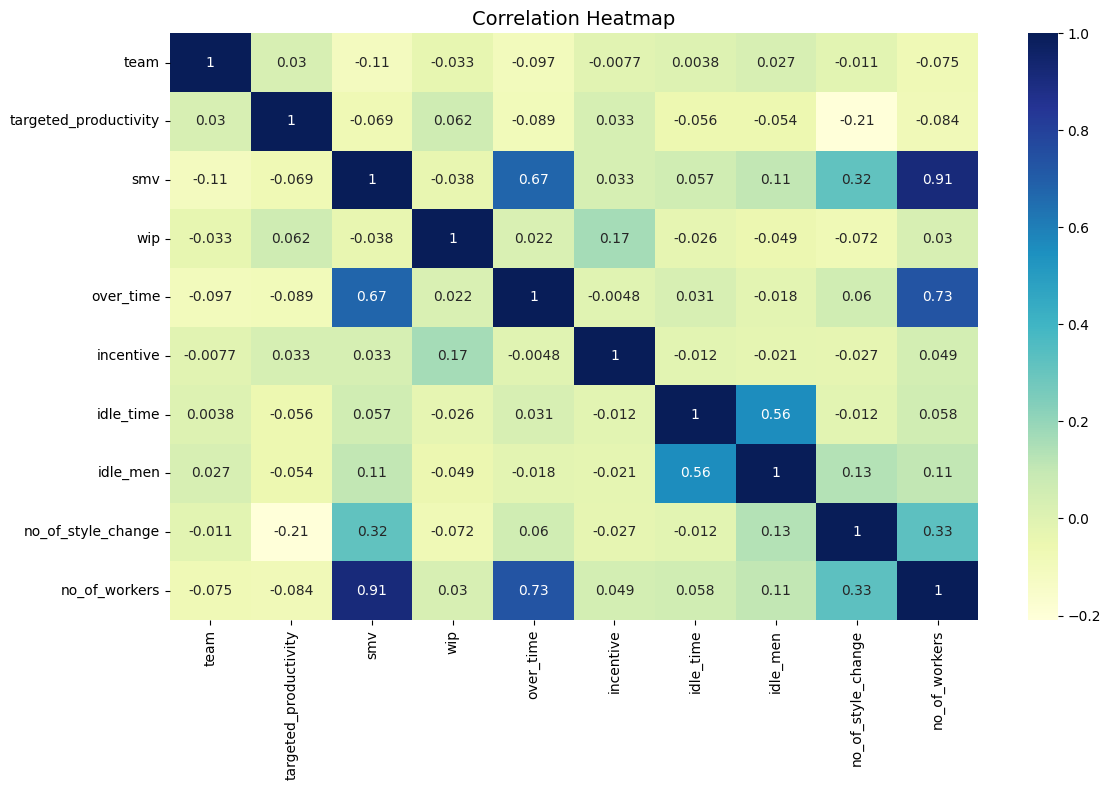

In [ ]:
# Compute correlation matrix
co_mtx = data.select_dtypes(include=np.number).corr()  # Select only numerical columns for correlation

# Print correlation matrix
print(co_mtx)

# Tambahkan ukuran figure di sini
plt.figure(figsize=(12, 8))  # <-- Ukuran dapat diubah sesuai kebutuhan, misal (14, 10)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True, annot_kws={"size": 10})  # 'annot_kws' untuk atur ukuran teks angka

# Display heatmap
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

Scatter Plot

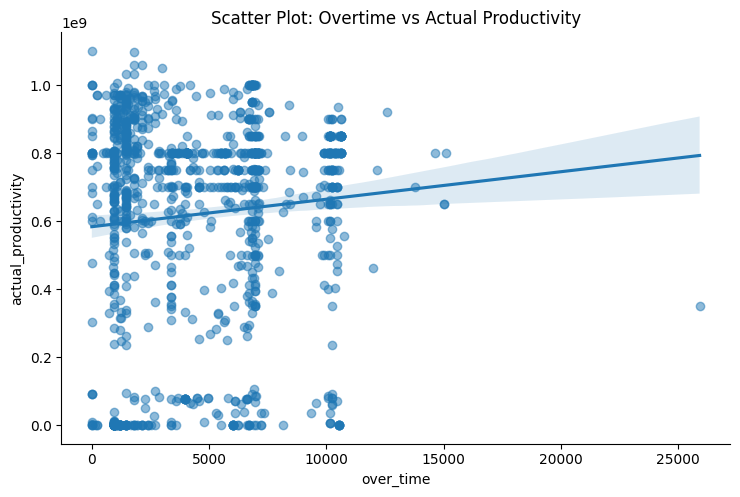

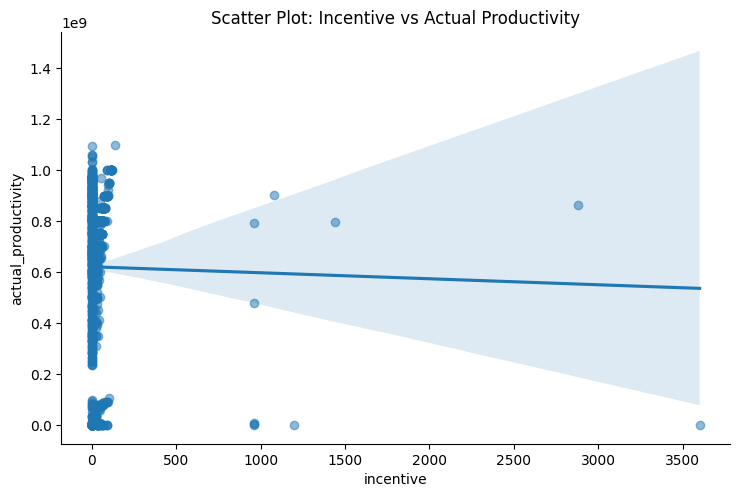

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Convert 'over_time' to string type before applying .str methods
data['over_time'] = data['over_time'].astype(str).str.replace('.', '').str.replace(',', '.')
data['over_time'] = pd.to_numeric(data['over_time'], errors='coerce')

data['actual_productivity'] = data['actual_productivity'].astype(str).str.replace('.', '').str.replace(',', '.')
data['actual_productivity'] = pd.to_numeric(data['actual_productivity'], errors='coerce')
# Scatterplot: over_time vs actual_productivity
sns.lmplot(data=data, x='over_time', y='actual_productivity', aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Scatter Plot: Overtime vs Actual Productivity")
plt.show()

# Scatterplot: incentive vs actual_productivity
sns.lmplot(data=data, x='incentive', y='actual_productivity', aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Scatter Plot: Incentive vs Actual Productivity")
plt.show()

Scatterplot Matrix (Pairplot)

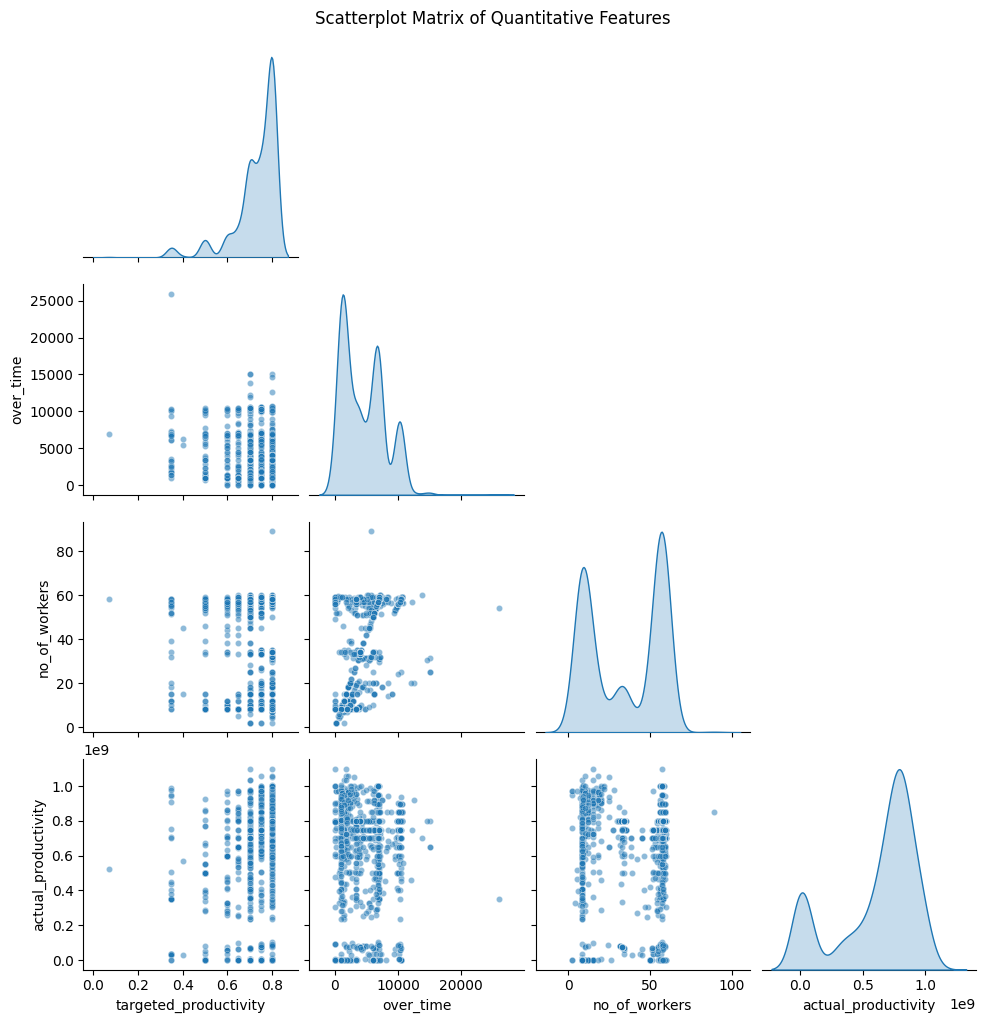

In [ ]:
quantitative_cols = ['targeted_productivity', 'over_time', 'no_of_workers', 'actual_productivity']

# Scatterplot matrix (pairplot)
sns.pairplot(data[quantitative_cols], corner=True, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle("Scatterplot Matrix of Quantitative Features", y=1.02)
plt.show()

# b. Quantitative vs Categorical

lmplot (Linear Regression per Kategori)

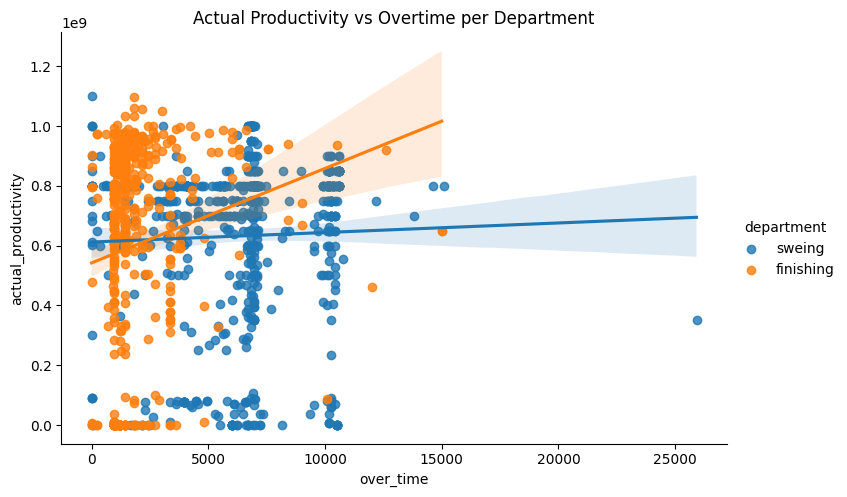

In [ ]:
# Hubungan actual_productivity vs over_time untuk tiap department
sns.lmplot(data=data, x='over_time', y='actual_productivity', hue='department', aspect=1.5)
plt.title("Actual Productivity vs Overtime per Department")
plt.show()

Subplot: Boxplot per Kategori

<ipython-input-23-5965a3ff9332>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='day', y='actual_productivity', palette="Set2")
<ipython-input-23-5965a3ff9332>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='department', y='over_time', palette="Set2")


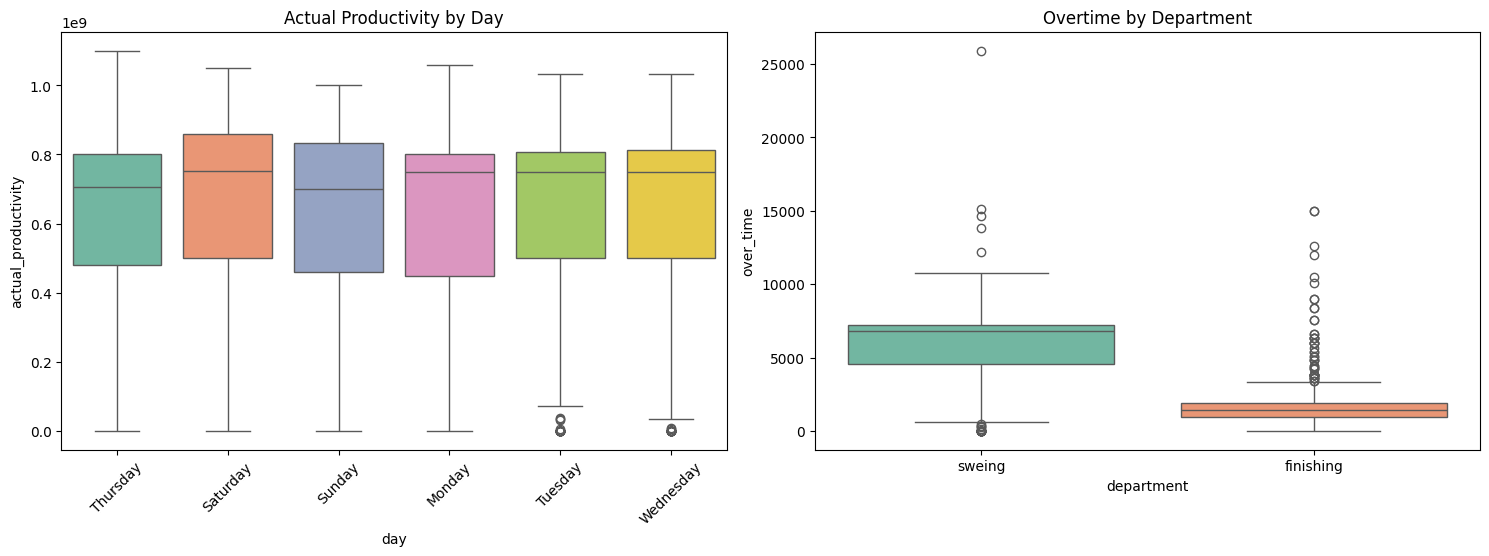

In [ ]:
plt.figure(figsize=(15, 10))

# Boxplot of actual_productivity by day
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='day', y='actual_productivity', palette="Set2")
plt.title("Actual Productivity by Day")
plt.xticks(rotation=45)

# Boxplot of over_time by department
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='department', y='over_time', palette="Set2")
plt.title("Overtime by Department")

plt.tight_layout()
plt.show()

# c. Categorical vs Categorical

Countplot: Categorical Cross

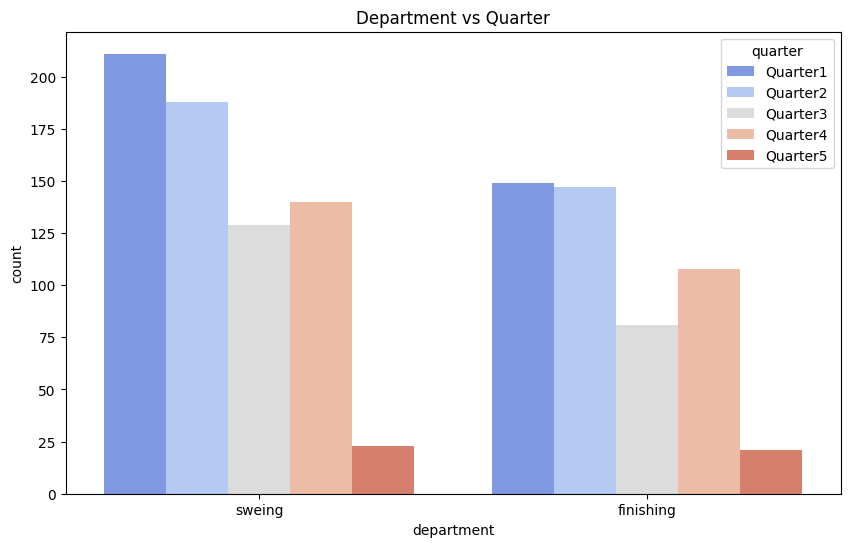

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='department', hue='quarter', palette="coolwarm")
plt.title("Department vs Quarter")
plt.show()

Subplot: Crosstab Heatmap dan Bar Count

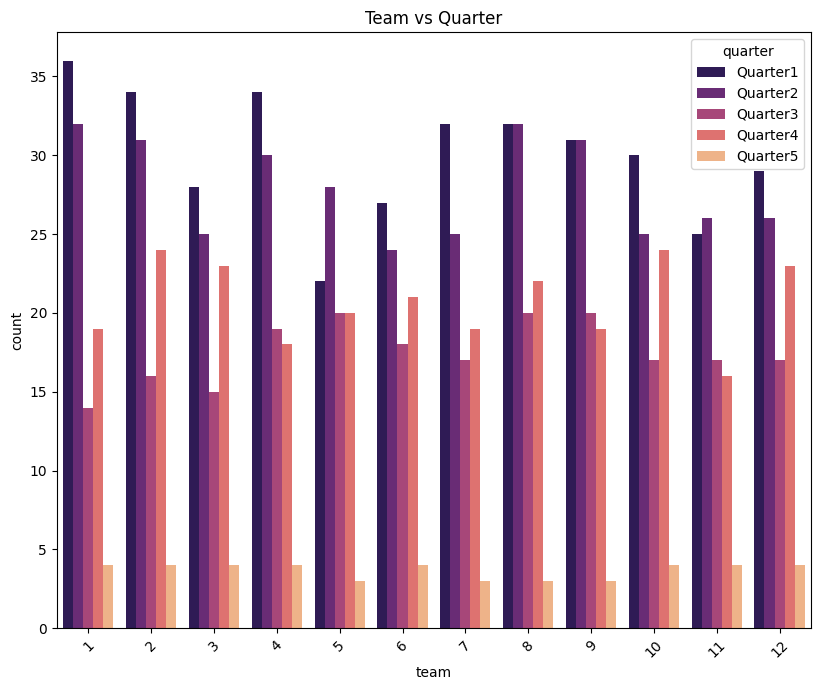

In [ ]:
# Crosstab: day vs quarter
ct = pd.crosstab(data['day'], data['quarter'])

plt.figure(figsize=(16, 7))

# Countplot: team vs quarter
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='team', hue='quarter', palette='magma')
plt.title("Team vs Quarter")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
